In [1]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import random
import math

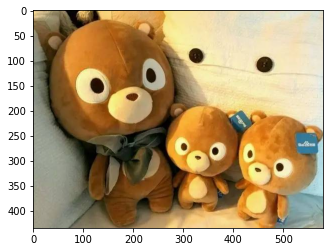

In [2]:
# 读入图片
img = Image.open('img/bear.png')

# 显示图片
plt.imshow(img)

In [3]:
def show_compare(src_img, dst_img):
    plt.figure(figsize=(9, 18))
    plt.subplot(1, 2, 1)
    plt.imshow(src_img)
    plt.subplot(1, 2, 2)
    plt.imshow(dst_img)

## 1. 图片缩放

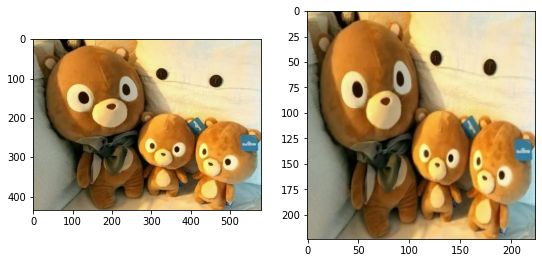

In [4]:
def resize_img(img, target_size):
    img = img.resize(target_size, Image.BILINEAR)
    return img

img_resize = resize_img(img, target_size=(224,224))
show_compare(img, img_resize)

## 2. 图片中心裁剪

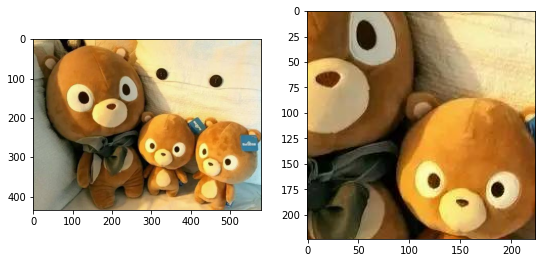

In [5]:
def center_crop_img(img, target_size):
    w, h = img.size
    tw, th = target_size
    assert (w >= tw) and (h >= th), "image size: ({}, {}) should larger than crop size: ({}, {})".format(w, h, tw, th)
    x1 = int(round((w - tw) / 2.))
    y1 = int(round((h - th) / 2.))
    img = img.crop(box=(x1, y1, x1+tw, y1+th))
    return img

img_center_crop = center_crop_img(img, target_size=(224, 224))
show_compare(img, img_center_crop)

## 3. 随机裁剪

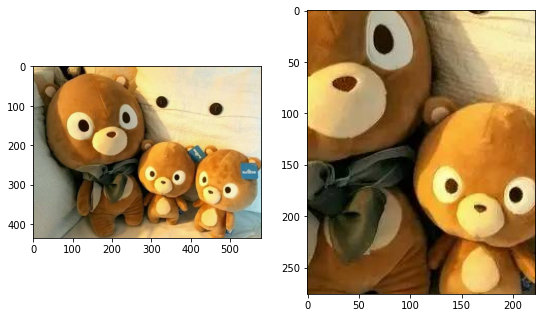

In [6]:
def random_crop_img(img, scale=(0.08, 1.0), ratio=(3./4., 4./3.)):
    aspect_ratio = math.sqrt(random.uniform(ratio[0], ratio[1]))
    w = 1. * aspect_ratio
    h = 1. / aspect_ratio
    
    target_area = img.size[0] * img.size[1] * random.uniform(scale[0], scale[1])
    
    target_size = math.sqrt(target_area)
    w = min(int(target_size * w), img.size[0])
    h = min(int(target_size * h), img.size[1])
    
    i = random.randint(0, img.size[0] - w + 1)
    j = random.randint(0, img.size[1] - h + 1)
    
    img = img.crop(box=(i, j, i+w, j+h))
    return img

img_random_crop = random_crop_img(img)
show_compare(img, img_random_crop)

## 4. 随机旋转

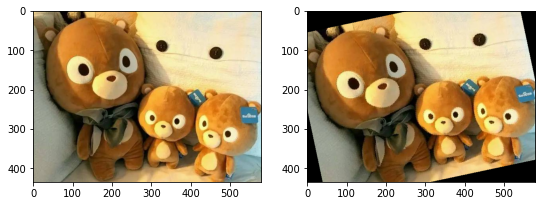

In [7]:
def rotate_img(img, angles):
    angle = random.randint(angles[0], angles[1])
    img = img.rotate(angle)
    return img

img_rotate = rotate_img(img, angles=(-15, 15))
show_compare(img, img_rotate)

## 5. 随机水平翻转

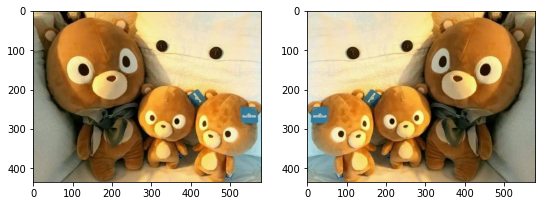

In [8]:
def flip_lr_img(img):
    prob = random.random()
    if prob < 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
    return img

img_flip_lr = flip_lr_img(img) 
show_compare(img, img_flip_lr)

## 6. 随机上下翻转

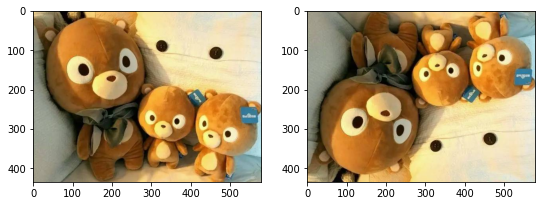

In [9]:
def flip_tb_img(img):
    prob = random.random()
    if prob < 0.5:
        img = img.transpose(Image.FLIP_TOP_BOTTOM)
    return img

img_flip_tb = flip_tb_img(img)
show_compare(img, img_flip_tb)

## 7. 亮度调整

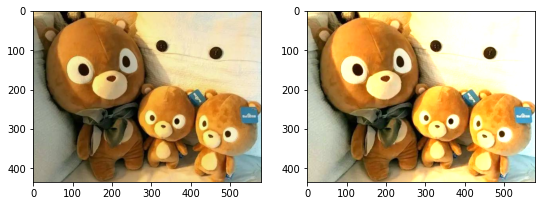

In [10]:
def bright_image(img):
    v = random.random()
    if v < 0.5:
        brightness_delta = 0.5
        delta = np.random.uniform(-brightness_delta, brightness_delta) + 1
        # delta值为0表示黑色图片，值为1表示原始图片
        img = ImageEnhance.Brightness(img).enhance(delta)
    return img

img_bright = bright_image(img)
show_compare(img, img_bright)

## 8. 对比度调整

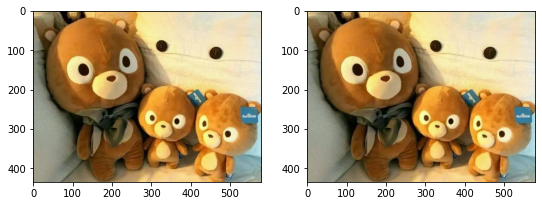

In [11]:
def contrast_image(img):
    v = random.random()
    if v < 0.5:
        contrast_delta = 0.5
        delta = np.random.uniform(-contrast_delta, contrast_delta) + 1
        # delta值为0表示灰度图片，值为1表示原始图片
        img = ImageEnhance.Contrast(img).enhance(delta)
    return img

img_contrast = contrast_image(img)
show_compare(img, img_contrast)

## 9. 饱和度调整

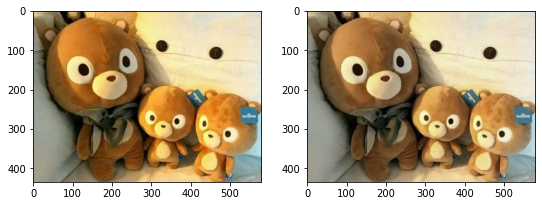

In [12]:
def saturation_image(img):
    v = random.random()
    if v < 0.5:
        saturation_delta = 0.5
        delta = np.random.uniform(-saturation_delta, saturation_delta) + 1
        # delta值为0表示黑白图片，值为1表示原始图片   
        img = ImageEnhance.Color(img).enhance(delta)
    return img

img_saturation = saturation_image(img)
show_compare(img, img_saturation)

## 10. 色度调整

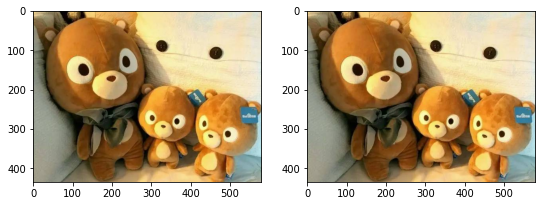

In [13]:
def hue_image(img):
    v = random.random()
    if v < 0.5:
        hue_delta = 18
        delta = np.random.uniform(-hue_delta, hue_delta)
        img_hsv = np.array(img.convert('HSV'))
        img_hsv[:, :, 0] = img_hsv[:, :, 0] + delta
        img = Image.fromarray(img_hsv, mode='HSV').convert('RGB')
    return img

img_hue = hue_image(img)
show_compare(img, img_hue)